In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraud.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
df=data.drop(['dob','unix_time','street','city','state'],axis=1)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,zip,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,84735,37.7175,-112.4777,258,Geoscientist,440b587732da4dc1a6395aba5fb41669,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,21790,39.2667,-77.5101,100,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,88325,32.9396,-105.8189,899,Naval architect,483f52fe67fabef353d552c1e662974c,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,57756,43.3526,-102.5411,1126,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,42.788940,-103.241160,0


In [6]:
 df['merged_col'] = df['first'].astype(str) + df['last'].astype(str)

In [7]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'zip', 'lat', 'long', 'city_pop',
       'job', 'trans_num', 'merch_lat', 'merch_long', 'is_fraud',
       'merged_col'],
      dtype='object')

In [9]:
df1=df.drop(['first','last'],axis=1)

In [10]:
df1.drop_duplicates()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,merged_col
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,JenniferBanks
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,StephanieGill
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,EdwardSanchez
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,JeremyWhite
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,TylerGarcia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,84735,37.7175,-112.4777,258,Geoscientist,440b587732da4dc1a6395aba5fb41669,36.841266,-111.690765,0,ErikPatterson
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,21790,39.2667,-77.5101,100,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,38.906881,-78.246528,0,JeffreyWhite
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,88325,32.9396,-105.8189,899,Naval architect,483f52fe67fabef353d552c1e662974c,33.619513,-105.130529,0,ChristopherCastaneda
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,57756,43.3526,-102.5411,1126,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,42.788940,-103.241160,0,JosephMurray


In [11]:
df1[df1['is_fraud']==1]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,merged_col
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,28611,35.9946,-81.7266,885,Soil scientist,e8a81877ae9a0a7f883e15cb39dc4022,36.430124,-81.179483,1,JasonMurphy
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,78208,29.4400,-98.4590,1595797,Horticultural consultant,bc7d41c41103877b03232f03f1f8d3f5,29.819364,-99.142791,1,MistyHart
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,78208,29.4400,-98.4590,1595797,Horticultural consultant,b98f12f4168391b2203238813df5aa8c,29.273085,-98.836360,1,MistyHart
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,M,28611,35.9946,-81.7266,885,Soil scientist,397894a5c4c02e3c61c784001f0f14e4,35.909292,-82.091010,1,JasonMurphy
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,F,78208,29.4400,-98.4590,1595797,Horticultural consultant,7863235a750d73a244c07f1fb7f0185a,29.786426,-98.683410,1,MistyHart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,F,32960,27.6330,-80.4031,105638,"Librarian, public",a83b093f0c1d9068fa0089f7c722615f,26.888686,-80.834389,1,AshleyCabrera
1295491,1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,F,32960,27.6330,-80.4031,105638,"Librarian, public",f75b35bed13b9e692f170dba45a15b21,28.216707,-79.855648,1,AshleyCabrera
1295532,1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,M,70726,30.4590,-90.9027,71335,Herbalist,a0ba2472cd3fc9731f2a18d3f308f5c3,29.700456,-91.361632,1,WilliamPerry
1295666,1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,F,79759,31.8599,-102.7413,23,Cytogeneticist,daa281350b1e16093c7b4bf97bf4d6ed,32.675272,-103.484949,1,BrookeSmith


In [12]:
df1['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
df1['trans_date_trans_time'] = df1['trans_date_trans_time'].astype(np.int64)

In [13]:
import joblib
category_encoder = LabelEncoder()
df1['category'] = category_encoder.fit_transform(df1['category'])
joblib.dump(category_encoder, 'category_encoder.pkl')

['category_encoder.pkl']

In [14]:
gender_encoder = LabelEncoder()
df1['gender'] = gender_encoder.fit_transform(df1['gender'])
joblib.dump(gender_encoder, 'gender_encoder.pkl')

['gender_encoder.pkl']

In [15]:
merchant_encoder = LabelEncoder()
df1['merchant'] = merchant_encoder.fit_transform(df1['merchant'])
joblib.dump(merchant_encoder, 'merchant_encoder.pkl')

['merchant_encoder.pkl']

In [16]:
job_encoder = LabelEncoder()
df1['job'] = job_encoder.fit_transform(df1['job'])
joblib.dump(job_encoder, 'job_encoder.pkl')

['job_encoder.pkl']

In [17]:
scaler=StandardScaler()
df1['amt']=scaler.fit_transform(df1[['amt']])

In [18]:
trans_num_encoder = LabelEncoder()
df1['trans_num'] = trans_num_encoder.fit_transform(df1['trans_num'])
joblib.dump(trans_num_encoder, 'trans_num_encoder.pkl')

['trans_num_encoder.pkl']

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  int64  
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  int64  
 4   category               1296675 non-null  int64  
 5   amt                    1296675 non-null  float64
 6   gender                 1296675 non-null  int64  
 7   zip                    1296675 non-null  int64  
 8   lat                    1296675 non-null  float64
 9   long                   1296675 non-null  float64
 10  city_pop               1296675 non-null  int64  
 11  job                    1296675 non-null  int64  
 12  trans_num              1296675 non-null  int64  
 13  merch_lat              1296675 non-null  float64
 14  merch_long        

In [20]:
df1['city_pop']=df1['city_pop'].fillna(df1['city_pop'].mean())
df1['merch_lat']=df1['merch_lat'].fillna(df1['merch_lat'].mean())
df1['merch_long']=df1['merch_long'].fillna(df1['merch_long'].mean())
df1['is_fraud']=df1['is_fraud'].fillna(df1['is_fraud'].mean())

In [21]:
merged_col_encoder = LabelEncoder()
df1['merged_col'] = merged_col_encoder.fit_transform(df1['merged_col'])
joblib.dump(merged_col_encoder, 'merged_col_encoder.pkl')

['merged_col_encoder.pkl']

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  int64  
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  int64  
 4   category               1296675 non-null  int64  
 5   amt                    1296675 non-null  float64
 6   gender                 1296675 non-null  int64  
 7   zip                    1296675 non-null  int64  
 8   lat                    1296675 non-null  float64
 9   long                   1296675 non-null  float64
 10  city_pop               1296675 non-null  int64  
 11  job                    1296675 non-null  int64  
 12  trans_num              1296675 non-null  int64  
 13  merch_lat              1296675 non-null  float64
 14  merch_long        

In [23]:
from sklearn.ensemble import IsolationForest
from joblib import dump

# Prepare the features (excluding 'is_fraud' column)
X1 = df1.drop('is_fraud', axis=1)

# Initialize and train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X1)

# Save the trained model
dump(iso_forest, 'anomaly_detection_model.joblib')

print("Model saved as 'anomaly_detection_model.joblib'")

Model saved as 'anomaly_detection_model.joblib'


In [24]:
df1.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'merch_lat', 'merch_long', 'is_fraud', 'merged_col'],
      dtype='object')

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  int64  
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  int64  
 4   category               1296675 non-null  int64  
 5   amt                    1296675 non-null  float64
 6   gender                 1296675 non-null  int64  
 7   zip                    1296675 non-null  int64  
 8   lat                    1296675 non-null  float64
 9   long                   1296675 non-null  float64
 10  city_pop               1296675 non-null  int64  
 11  job                    1296675 non-null  int64  
 12  trans_num              1296675 non-null  int64  
 13  merch_lat              1296675 non-null  float64
 14  merch_long        

In [26]:
x=df1.drop(['is_fraud'],axis=1)
y=df1['is_fraud']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
model=Sequential(
    [
        Dense(300,activation='relu',input_shape=(x_train.shape[1],)),
        Dense(100,activation='relu'),
        Dense(32,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 116s 4ms/step - accuracy: 0.9915 - loss: 149287711277056.0000
Epoch 2/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 168s 4ms/step - accuracy: 0.9943 - loss: 0.0354
Epoch 3/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 116s 4ms/step - accuracy: 0.9941 - loss: 0.0362
Epoch 4/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 155s 5ms/step - accuracy: 0.9942 - loss: 0.0355
Epoch 5/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 143s 4ms/step - accuracy: 0.9943 - loss: 0.0354
Epoch 6/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 115s 4ms/step - accuracy: 0.9941 - loss: 0.0364
Epoch 7/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 112s 3ms/step - accuracy: 0.9943 - loss: 0.0352
Epoch 8/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 117s 4ms/step - accuracy: 0.9944 - loss: 0.0347
Epoch 9/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 136s 3ms/step - accuracy: 0.9942 - loss: 0.0358
Epoch 10/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 116s 4ms/step - accuracy: 0.9943 - loss: 0.0353


In [31]:
model.evaluate(x_test,y_test)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9941 - loss: 0.0362


[0.03598298877477646, 0.9941388368606567]

In [32]:
x_test.shape

(259335, 16)

<Axes: >

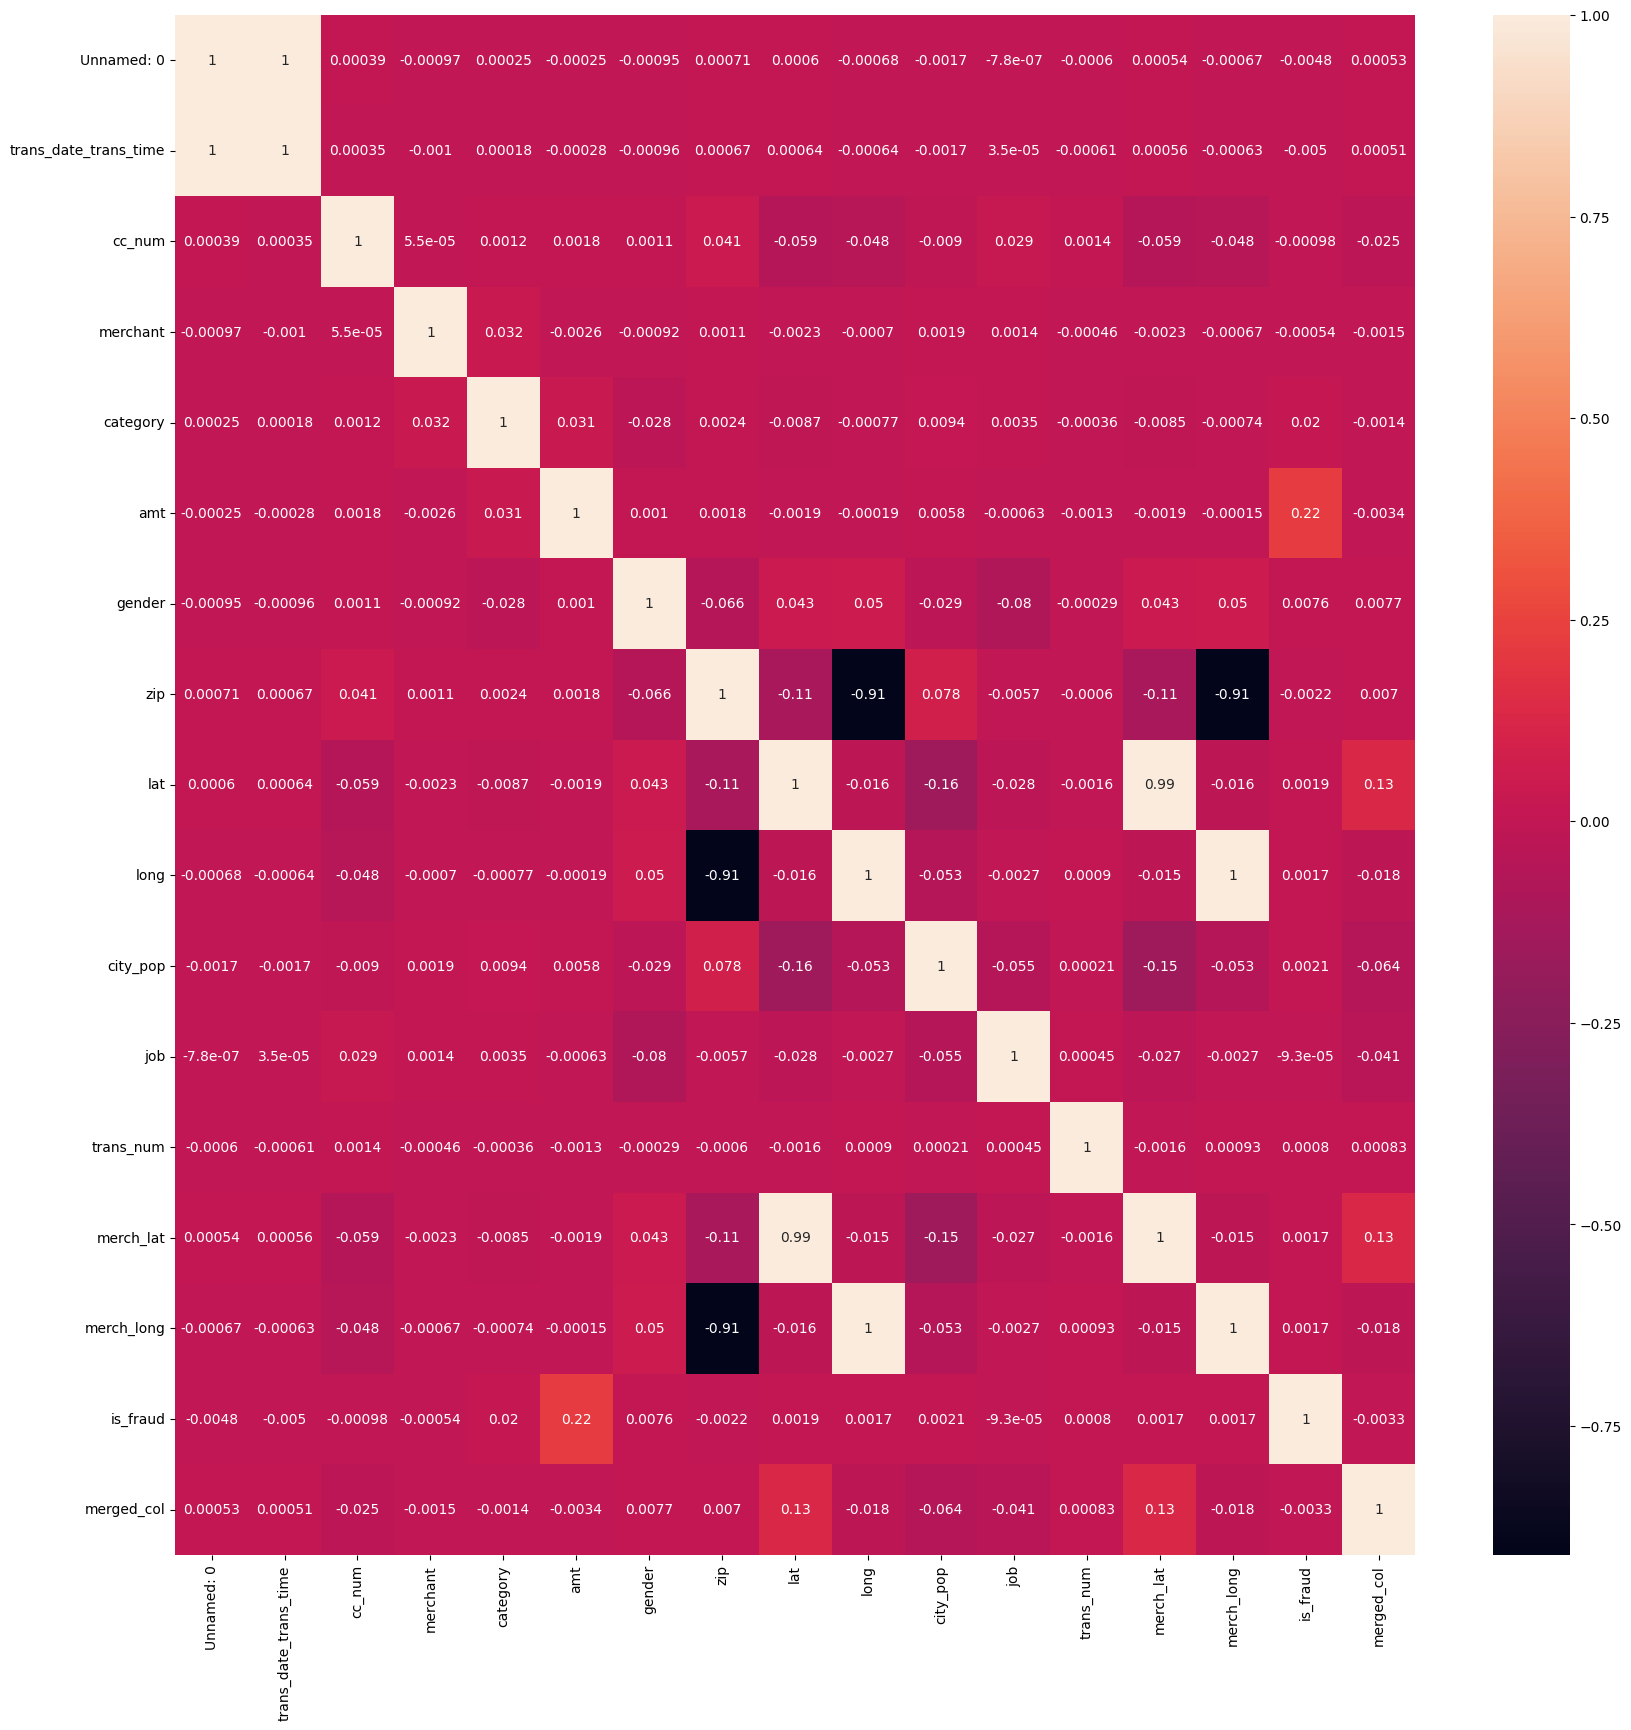

In [33]:
plot=plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)

In [34]:
model.save('fraud_detection.h5')
print("keras model saved successfully")

keras model saved successfully


In [35]:
import datetime
import random
import numpy as np
from flask import Flask, request, render_template
from tensorflow.keras.models import load_model
import pandas as pd
import joblib

In [37]:
app = Flask(__name__)

# Load the trained model and preprocessors (ensure paths are correct)
model = load_model('fraud_detection.h5')
merchant_encoder = joblib.load('merchant_encoder.pkl')
category_encoder = joblib.load('category_encoder.pkl')
gender_encoder = joblib.load('gender_encoder.pkl')
job_encoder = joblib.load('job_encoder.pkl')
trans_num_encoder = joblib.load('trans_num_encoder.pkl')
merged_col_encoder = joblib.load('merged_col_encoder.pkl')

In [ ]:
@app.route('/')
def home():
    return "hello"

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        # Capture input fields from the form
        unnmae = random.randint(1000000000000000, 9999999999999999)
        trans_date_trans_time = datetime.datetime.now()  # Use the current datetime
        cc_num = random.randint(698585855, 8525629555262625)
        merchant = request.form['merchant_name']
        category = request.form['category']
        amt = float(request.form['amount'])
        gender = request.form['gender']
        zip_code = random.randint(20000, 80000)
        lat = int(request.form['user_lat'])
        longi = int(request.form['user_long'])
        job = request.form['job']
        trans_num = request.form['transaction_number']
        merch_lat = int(request.form['merch_lat'])
        merch_long = int(request.form['merch_long'])
        full_name = request.form['full_name']

        # Feature processing
        merchant = merchant_encoder.transform([merchant])[0]  # Convert categorical 'merchant' to numerical
        category = category_encoder.transform([category])[0]  # Same for 'category'
        gender = gender_encoder.transform([gender])[0]  # Convert 'gender' to numerical
        job = job_encoder.transform([job])[0]  # Convert 'job' to numerical

        # Convert datetime to relevant features (e.g., hour of day, day of week)

        # Normalize 'amt' using StandardScaler

        # Create a feature array for prediction
        features = [
            unnmae,trans_date_trans_time, cc_num, merchant, category, amt, gender,
            zip_code, lat, longi , job, trans_num, merch_lat, merch_long, full_name
        ]

        # Create DataFrame for consistency with model's expected input format
        data = pd.DataFrame([features], columns=['trans_date_trans_time_hour', 'trans_date_trans_time_day_of_week',
                                                 'cc_num', 'merchant', 'category', 'amt', 'gender', 'zip_code', 'lat',
                                                 'long', 'job', 'trans_num', 'merch_lat', 'merch_long', 'full_name'])

        # Assuming the model expects the data to be preprocessed similarly as training data
        prediction = model.predict(data)

        # Return the prediction as part of the response
        return render_template('result.html', prediction=prediction[0])


if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
